In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sklearn
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_style('white')

In [2]:
#dataset

df = pd.read_csv("/Users/elijahwoolford/Desktop/python /countries of the world.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
#Cleaning

for column in df:
    if "," in str(df[column][0]):
        df[column] = df[column].apply(lambda x: float(re.sub(",", ".", str(x))))
        df[column] = df[column].fillna(df[column].mean())


In [4]:
#Remove white space from region

df["Region"] = df["Region"].apply(lambda x: x.strip())
df["Region"].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [5]:
#Correlation Matrix

df.drop(["Infant mortality (per 1000 births)"],1,inplace=True)
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,-0.039324,-0.043376,-0.030803,0.188201,-0.060741,-0.120575,-0.045075,-0.028354,0.000375,0.099109,-0.080681
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047442,0.072185,0.035784,0.053360,-0.079674,-0.143844,0.138904,-0.066389,0.040049,-0.050380,0.120907,-0.054080
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.177990,0.195773,0.095056,0.280079,-0.080999,-0.031655,0.081844,-0.159150,-0.070022,-0.105925,-0.105524,0.187798
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134035,0.049118,0.113651,0.152050,-0.120636,0.341433,-0.079404,-0.075715,-0.161703,-0.028483,-0.185124,0.181939
Net migration,0.000011,0.047442,0.177990,-0.134035,1.000000,0.381969,-0.008506,0.239424,-0.057689,-0.340151,0.222815,-0.066523,0.033605,-0.105674,-0.023679,0.113697
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.381969,1.000000,0.497963,0.830549,0.019693,-0.218476,0.097498,-0.648808,-0.201148,-0.570735,-0.027935,0.531253
Literacy (%),-0.043376,0.035784,0.095056,0.113651,-0.008506,0.497963,1.000000,0.549913,0.101927,0.038808,-0.102439,-0.755196,-0.386376,-0.585492,0.060661,0.465706
Phones (per 1000),-0.030803,0.053360,0.280079,0.152050,0.239424,0.830549,0.549913,1.000000,0.059606,-0.149517,0.029317,-0.722329,-0.259708,-0.571704,-0.140516,0.625770
Arable (%),0.188201,-0.079674,-0.080999,-0.120636,-0.057689,0.019693,0.101927,0.059606,1.000000,0.094361,-0.856763,-0.183449,0.052991,-0.034080,-0.061923,0.088649
Crops (%),-0.060741,-0.143844,-0.031655,0.341433,-0.340151,-0.218476,0.038808,-0.149517,0.094361,1.000000,-0.594254,0.117851,-0.201520,0.051367,-0.113796,0.051980


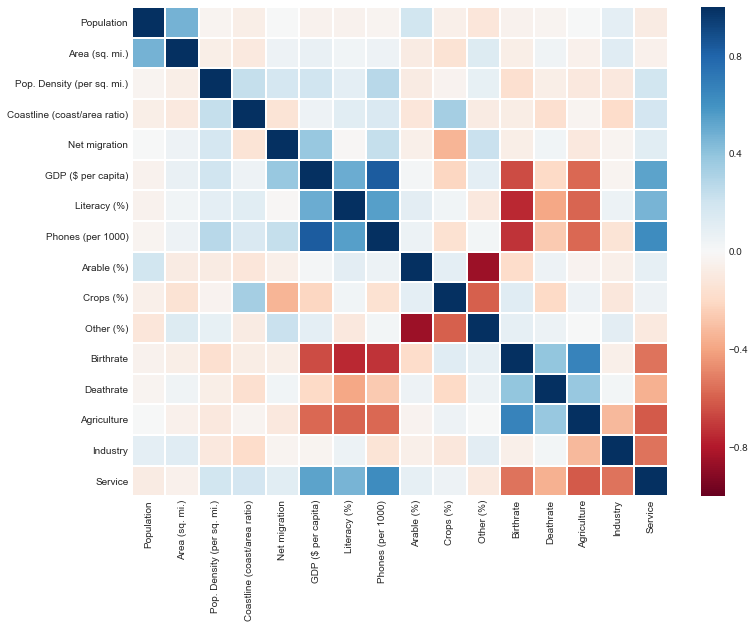

In [6]:
#Heatmap
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu", ax=ax, linewidths=1)

In [7]:
sort_pop = df["Population"].sort_values(ascending=False).head(20)
sort_pop

42     1313973713
94     1095351995
214     298444215
95      245452739
27      188078227
156     165803560
16      147365352
169     142893540
152     131859731
103     127463611
135     107449525
162      89468677
219      84402966
76       82422299
60       78887007
65       74777981
206      70413958
96       68688433
201      64631595
45       62660551
Name: Population, dtype: int64

In [8]:
pop_norm = preprocessing.normalize(df["Population"].reshape(1,-1))
area_norm = preprocessing.normalize(df["Area (sq. mi.)"].reshape(1,-1))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [15]:
#Feature engineering

features = pd.DataFrame()

#These seperate the region in their respective hemispheres 
features["Western_Hemi"] = np.where((df["Region"].isin(["LATIN AMER. & CARIB", "NORTHERN AMERICA"])), 1,0)
features["Eastern_Hemi"] = np.where((features["Western_Hemi"].isin([0])), 1,0)

#Slightly correlated combined features
features["net_life_rate"] = df["Deathrate"] - df["Birthrate"]
features["normal_pop"] = pop_norm[0]
features["normal_area"] = area_norm[0]
features["pop_area"] = pop_norm[0]*area_norm[0]
features["land_crops"] = df["Arable (%)"] * df["Crops (%)"]
features["literacy_phones"] = df["Literacy (%)"] * df["Phones (per 1000)"]

#Predictor
features["GDP_rank"] = np.where(df["GDP ($ per capita)"] > df["GDP ($ per capita)"].mean(),1,0)

In [16]:
features.head(10)

,Western_Hemi,Eastern_Hemi,net_life_rate,normal_pop,normal_area,pop_area,land_crops,literacy_phones,GDP_rank
0,0,1,-26.26,0.017023,0.022813,3.883426e-04,2.6686,115.20,0
1,0,1,-9.89,0.001963,0.001013,1.988416e-06,93.2178,6158.80,0
2,0,1,-12.53,0.018050,0.083914,1.514618e-03,0.8050,5467.00,0
3,0,1,-19.19,0.000032,0.000007,2.221016e-10,150.0000,25171.50,0
4,0,1,-2.46,0.000039,0.000016,6.434988e-10,0.0000,49720.00,1
5,0,1,-20.91,0.006647,0.043924,2.919669e-04,0.5784,327.60,0
6,1,0,-8.83,0.000007,0.000004,2.654662e-11,0.0000,43700.00,0
7,1,0,-11.56,0.000038,0.000016,5.912182e-10,82.7190,48941.10,1
8,1,0,-9.18,0.021882,0.097484,2.133134e-03,5.9088,21400.84,1
9,0,1,-3.84,0.001631,0.001050,1.712850e-06,40.3650,19296.02,0


In [17]:
#Train test split

features_train = features.drop(columns=["GDP_rank"])

X_train, X_test, y_train, y_test = train_test_split(features_train, 
                                                    features["GDP_rank"], test_size=0.4)

In [18]:
#Linear Regression

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("Coefficients:", reg.coef_)
print("\nIntercept:", reg.intercept_)
print("\nR2:", reg.score(X_test, y_test))

Coefficients: [-3.07160251e-02  3.07160247e-02  2.18959249e-03  1.57391936e+00
  4.27639954e-01 -1.50259536e+01 -2.89399011e-04  1.53111763e-05]

Intercept: 0.0337039806955684

R2: 0.45183337013477537


In [24]:
#Ridge Regression

ridgeregr = linear_model.Ridge(alpha=1, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print("Coefficients:", ridgeregr.coef_)
print("\nIntercept:", ridgeregr.intercept_)
print("\nR2:", ridgeregr.score(X_test, y_test))

Coefficients: [ 1.72092581e-02  8.92400504e-02  2.22449296e-03 -4.89045014e-02
 -1.48092798e-01 -3.01023871e-02 -2.95464110e-04  1.48476815e-05]

Intercept: 0.0

R2: 0.6370935264859189


In [20]:
#Lasso Regression

lass = linear_model.Lasso(alpha=.75)
lassfit = lass.fit(X_train, y_train)
print("Coefficients:", lassfit.coef_)
print("\nIntercept:", lassfit.intercept_)
print("\nR2:", lassfit.score(X_test, y_test))

Coefficients: [-0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.84099044e-04  1.52262893e-05]

Intercept: 0.03163510091790217

R2: 0.5982161662482939
